In [20]:
import numpy as np
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import pandas as pd
from platform import python_version

print(python_version())
print(np.version.version)

btc_workbook = load_workbook(r'C:\Users\angel\OneDrive\Desktop\ECE 4850 - Machine Learning\ECE-4850-Machine-Learning\project1\BTC-USD.xlsx')
cols = [6] # We will use just the 6th column
df = pd.read_excel('BTC-USD.xlsx', usecols=cols)
closes = np.array([df])


3.9.13
1.23.3


In [12]:
btc_sheet = btc_workbook.active
closing_values = np.array([])
for value in btc_sheet.iter_rows(min_row=2,
                                min_col=6,
                                max_col=6,
                                values_only=True):
    closing_values = np.append(closing_values, value)
print(f"closes: {closes.shape}\n {closes}")
print(f"closing_values:{closing_values.shape}\n {closing_values}")
closes  = closes.reshape((closes.size,)) 
print(f"closes:{closes.shape}\n {closes}")


closes: (1, 2198, 1)
 [[[  998.325012]
  [ 1021.75    ]
  [ 1043.839966]
  ...
  [16836.736328]
  [16951.96875 ]
  [16924.707031]]]
closing_values:(2198,)
 [  998.325012  1021.75      1043.839966 ... 16836.736328 16951.96875
 16924.707031]
closes:(2198,)
 [  998.325012  1021.75      1043.839966 ... 16836.736328 16951.96875
 16924.707031]


In [13]:
mean_cv = np.sum(closing_values) / closing_values.size
mean = np.sum(closes) / closes.size
print(f"Mean of the closing values: {mean_cv}")
print(f"Mean of the closing values: {mean}")

alpha = closing_values - mean_cv
difference = closes - mean
print(f"alpha: {alpha.shape}\n {alpha}")
print(f"difference: {difference.shape}\n {difference}")
variance = np.dot(alpha.T, alpha) / closing_values.size
my_variance = np.dot(difference, difference.T) / closes.size
print(f"Variance of the closing values: {variance}")
print(f"Variance of the closing values: {my_variance}")
# variance = my_variance
# alpha = difference
# mean_cv = mean
# closing_values = closes

Mean of the closing values: 17615.18705954322
Mean of the closing values: 17615.18705954322
alpha: (2198,)
 [-16616.86204754 -16593.43705954 -16571.34709354 ...   -778.45073154
   -663.21830954   -690.48002854]
difference: (2198,)
 [-16616.86204754 -16593.43705954 -16571.34709354 ...   -778.45073154
   -663.21830954   -690.48002854]
Variance of the closing values: 279202848.84193856
Variance of the closing values: 279202848.84193856


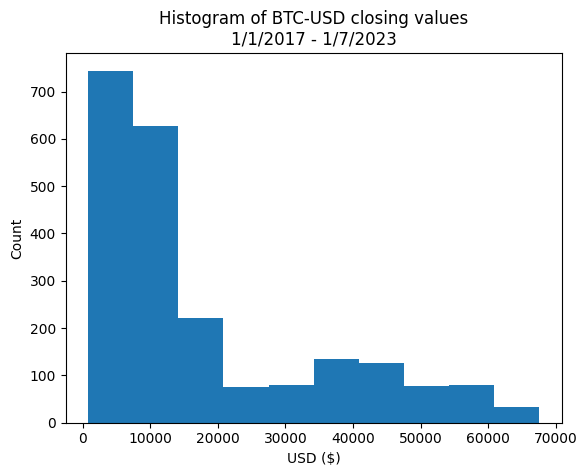

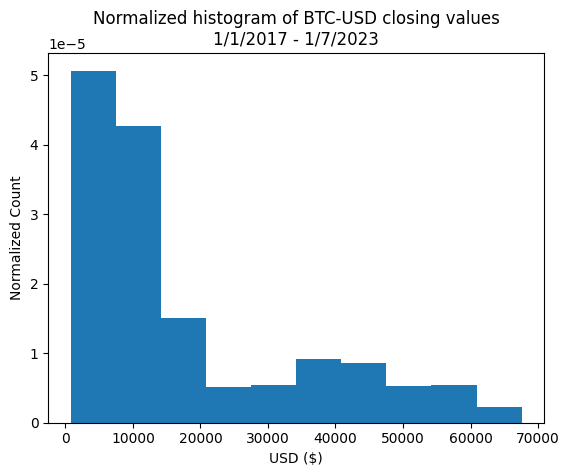

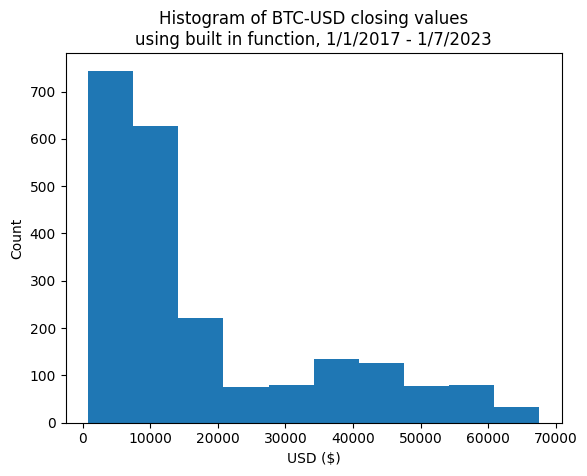

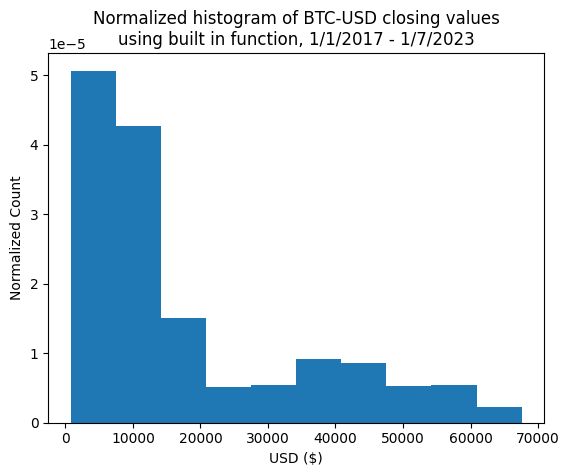

In [14]:
num_bins = 10

counts_cv = np.zeros(num_bins)
bins_cv = np.linspace(np.amin(closing_values), np.amax(closing_values), num_bins+1)
for value in closing_values:
    for i in range(num_bins-1, -1, -1):
        if value >= bins_cv[i]:
            counts_cv[i] += 1
            break

plt.stairs(counts_cv, bins_cv, fill=True)
plt.title("Histogram of BTC-USD closing values\n1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Count')
plt.show()

plt.stairs((counts_cv / (np.sum(counts_cv) * np.diff(bins_cv))), bins_cv, fill=True)
plt.title("Normalized histogram of BTC-USD closing values\n1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Normalized Count')
plt.show()

# using the built in values
plt.hist(closing_values)
plt.title("Histogram of BTC-USD closing values\nusing built in function, 1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Count')
plt.show()

plt.hist(closing_values, density=True)
plt.title("Normalized histogram of BTC-USD closing values\nusing built in function, 1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Normalized Count')
plt.show()

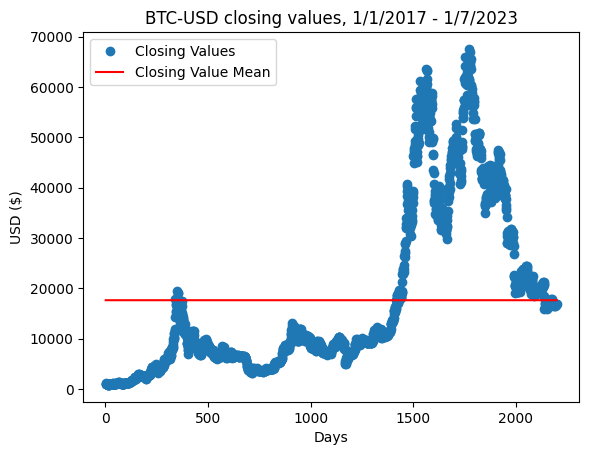

In [15]:
num_days = np.arange(1, closing_values.size + 1)
plt.plot(num_days, closing_values, 'o', label='Closing Values')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.title('BTC-USD closing values, 1/1/2017 - 1/7/2023')
plt.plot(num_days, mean_cv*np.ones((closing_values.size, 1)), 'r', label='Closing Value Mean')
#plt.plot(num_days, np.median(closing_values)*np.ones((closing_values.size, 1)), 'g', label='Closing Value Median')
plt.legend()
plt.show()

In [19]:
x = num_days
X_aug = np.stack((x**5, x**4, x**3, x**2, x, np.ones((x.size))), axis=1)
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug)), X_aug.T), closing_values)
print(f"Beta: {Beta.shape}\n {Beta}")
# Beta = np.array([-7.06513467e-12, -2.70702376e-8, 1.83885764e-4, -2.47022316e-1, 1.09579234e2, -6.40215801e3])
# print(f"Beta: {Beta.shape}\n {Beta}")



Beta: (6,)
 [ 6.23870557e-09 -1.73522996e-07 -2.06356236e-06  5.67657686e-04
  1.70991312e+01 -1.63589160e+03]


<class 'numpy.float64'>


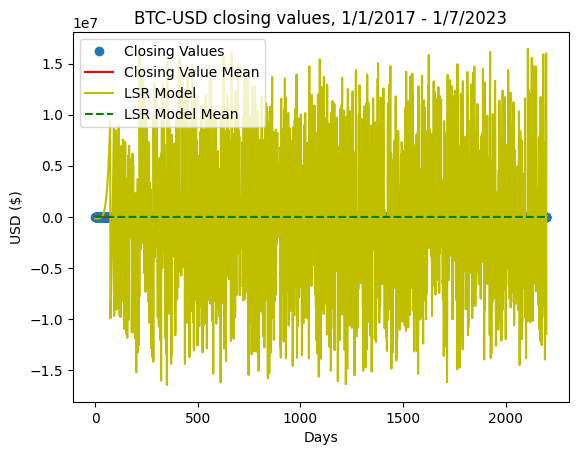

In [17]:
Y_hat = np.dot(X_aug, Beta)
mean_Y_hat = np.sum(Y_hat) / Y_hat.size
print(f'{type(mean_Y_hat)}')
plt.plot(num_days, closing_values, 'o', label='Closing Values')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.title('BTC-USD closing values, 1/1/2017 - 1/7/2023')
plt.plot(num_days, mean_cv*np.ones((closing_values.size, 1)), 'r', label='Closing Value Mean')
plt.plot(num_days, Y_hat, 'y', label='LSR Model')
plt.plot(num_days, mean_Y_hat*np.ones((Y_hat.size, 1)), 'g', linestyle='dashed', label='LSR Model Mean')
plt.legend()
plt.show()

In [18]:
# Feb 15th, 2023 corresponds to day 2237
x_day = 2237
equation_vector = np.array([x_day**5, x_day**4, x_day**3, x_day**2, x_day, 1])
y_hat_cv = np.dot(equation_vector, Beta)
print(f"The predicted closing value of BTC on Feb. 15th, 2023 is: ${np.around(y_hat_cv, decimals=2)}")
print(f"This seems fairly accurate, lol.")

The predicted closing value of BTC on Feb. 15th, 2023 is: $260641123473781.72
This seems fairly accurate, lol.
